Liczba iteracji: 
 59

 Rozwiązanie wyliczone: 
 [0.1942768  0.1309302  0.14679492 0.16231132 0.09196261 0.13520749
 0.11957884 0.11199722 0.14035395 0.11669838 0.12768501 0.12976703
 0.11792602 0.12996005 0.12321573 0.12332363 0.1282149  0.12231971
 0.12616839 0.1255078  0.12357098 0.12637776 0.12428319 0.12490572
 0.12561554 0.12431501 0.1254153  0.12497053 0.12474604 0.12533124
 0.12476996 0.12505071 0.12509844 0.12484398 0.12512289 0.12495816
 0.12496553 0.12507147 0.1249363  0.12502824 0.12500979 0.12496824
 0.12503211 0.12498274 0.12499872 0.12501356 0.12498422 0.12500983
 0.12499891 0.12499445 0.12500754 0.12499465 0.12500128 0.12500216
 0.12499649 0.12500274 0.12499913 0.12499917 0.12500158 0.12499876
 0.12500033 0.1250005  0.1249993  0.12500033 0.12500036 0.12499927
 0.1250005  0.12500033 0.12499876 0.12500158 0.12499919 0.12499911
 0.12500277 0.1249965  0.12500216 0.12500131 0.12499465 0.12500754
 0.12499447 0.12499892 0.12500988 0.12498423 0.1250136  0.12499874
 0.12498277 0

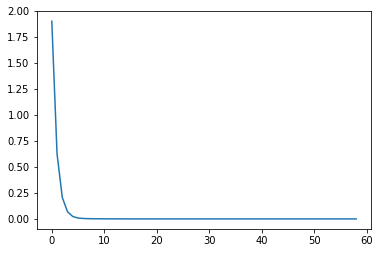

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as alg 
%matplotlib inline

#rozwiązujemy Ax=e

# definiuje macierz A
A = np.zeros((128,128),dtype='float32')
np.fill_diagonal(A,4)
for i in range(127):
    A[i][i+1] = 1
    A[i+1][i] = 1
for i in range(124):
    A[i+4][i] = 1
    A[i][i+4] = 1

# wektor e
e = np.array([1 for i in range(128)], dtype='float32')


# Równanie macierzowe metody Gaussa Siedla       x(k+1) = [M^(-1)N] x(k) + [M^(-1)b]

# macierze trójkątne
M = np.tril(A) # macierz trójkątna dolna z diagonalą
invM = alg.inv(M)

N = (-1)*(A - M) # macierz trójkątana górna
Z = np.dot(invM,N) #iloczyny tych macierzy nie będą się zmieniać więc policze je tylko raz
W = np.dot(invM,e)

x = np.zeros_like(e) # początkowy wektor rozwiązań


steps = 100  # maksymalna liczba iteracji
j=0


norm_list = list()

for i in range(steps):
    x_k = np.dot(Z,x) + W
     
    # norma
    a = x_k - x
    norm = np.sqrt(a.T@a)
    norm_list.append(norm)
    
    x=x_k
    j+=1 
    if norm <= 1e-12:
        break


python_solution = alg.solve(A,e)
print("Liczba iteracji: \n", j)
print("\n Rozwiązanie wyliczone: \n", x_k)
print("\n Rozwiązanie z Pythona:\n", python_solution)
print("\n Różnica rozwiązania pomiędzy kodem a funkcja w Pythonie: \n", python_solution-x_k)

plt.plot([i for i in range(j)],norm_list)
plt.show()